In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AAPL_COMB.csv')

In [3]:
df.columns

Index(['Date', 'Close', 'Rates'], dtype='object')

In [4]:
#df = df.drop(['Volume', 'std', 'upper', 'lower'], axis = 1)

In [5]:
df['lag'] = df['Close'].shift()
df['std_1'] = df['Close'].rolling(5).std().dropna().shift()

In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Date,Close,Rates,lag,std_1
5,2000-11-10,1.361607,6.17,1.441964,0.065642
6,2000-11-13,1.383929,6.17,1.361607,0.070133
7,2000-11-14,1.446429,6.17,1.383929,0.062180
8,2000-11-15,1.419643,6.17,1.446429,0.038221
9,2000-11-16,1.357143,6.17,1.419643,0.036949


In [8]:
df['std'] = df['Close'].rolling(5).std().dropna()

In [9]:
df.dropna(inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.set_index('Date', inplace=True)

For GE I am going to make my train test split on the year 2014

In [12]:
train_df = df[:'2014']
test_df = df['2015':]

In [13]:
train_df.tail()

,Close,Rates,lag,std_1,std
Date,,,,,
2014-12-24,112.010002,0.03,112.540001,1.437159,0.476687
2014-12-26,113.989998,0.03,112.010002,0.476687,0.874396
2014-12-29,113.910004,0.03,113.989998,0.874396,0.862131
2014-12-30,112.519997,0.03,113.910004,0.862131,0.898627
2014-12-31,110.379997,0.03,112.519997,0.898627,1.493645


In [14]:
test_df.tail()

,Close,Rates,lag,std_1,std
Date,,,,,
2018-10-02,229.279999,2.03,227.259995,2.765297,3.299545
2018-10-03,232.070007,2.03,229.279999,3.299545,2.875024
2018-10-04,227.990005,2.03,232.070007,2.875024,2.385556
2018-10-05,224.289993,2.03,227.990005,2.385556,2.844152
2018-10-08,223.770004,2.03,224.289993,2.844152,3.482401


To see this visually, we can make a line plot of the train and test data

In [15]:
import matplotlib.pyplot as plt

In [16]:
graph_df_train = train_df
maper = {'Close':'Train'}
graph_df_train.rename(maper, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [17]:
graph_df_test = test_df
maper = {'Close':'Test'}
graph_df_test.rename(maper, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


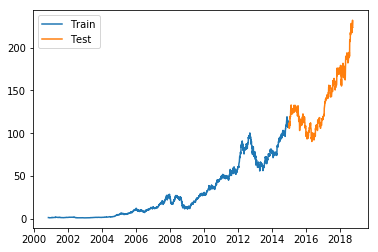

In [18]:
plt.plot(graph_df_train['Train'])
plt.plot(graph_df_test['Test'])
plt.legend();

As you can see, 2014 is a year where the pattern of a downward trend may begin again. Lets build a model to find out. 

In [19]:
df.head()

,Close,Rates,lag,std_1,std
Date,,,,,
2000-11-16,1.357143,6.17,1.419643,0.036949,0.038455
2000-11-17,1.321429,6.17,1.357143,0.038455,0.049471
2000-11-20,1.352679,6.17,1.321429,0.049471,0.051678
2000-11-21,1.343750,6.17,1.352679,0.051678,0.036623
2000-11-22,1.321429,6.17,1.343750,0.036623,0.016999


In [20]:
train_df = df[:'2014']
test_df = df['2015':]

In [21]:
test_df.head()

,Close,Rates,lag,std_1,std
Date,,,,,
2015-01-02,109.330002,0.03,110.379997,1.493645,2.099317
2015-01-05,106.250000,0.03,109.330002,2.099317,2.964452
2015-01-06,106.260002,0.03,106.250000,2.964452,2.713864
2015-01-07,107.750000,0.03,106.260002,2.713864,1.842940
2015-01-08,111.889999,0.03,107.750000,1.842940,2.377788


Scale Data

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
#X_train = train_df[['lag', 'std_1', 'Rates']].values
#X_test = test_df[['lag', 'std_1', 'Rates']].values

In [25]:
X_train = train_df[['lag']].values
X_test = test_df[['lag']].values

In [26]:
X_train

array([[  1.419643],
       [  1.357143],
       [  1.321429],
       ...,
       [113.989998],
       [113.910004],
       [112.519997]])

In [27]:
train_df_sc = scaler.fit_transform(X_train)
test_df_sc = scaler.transform(X_test)

In [28]:
print(train_df_sc.shape)
print(test_df_sc.shape)

(3551, 1)
(949, 1)


In [29]:
train_df_sc

array([[0.00408681],
       [0.00355743],
       [0.00325493],
       ...,
       [0.95756496],
       [0.95688741],
       [0.94511396]])

In [30]:
from sklearn.svm import SVR

In [31]:
svr = SVR()

In [32]:
y_train = train_df['Close'].values.reshape(-1,1)

In [33]:
len(X_train)

3551

In [34]:
len(y_train)

3551

In [35]:
svr.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred = svr.predict(X_test)

In [37]:
len(y_pred)

949

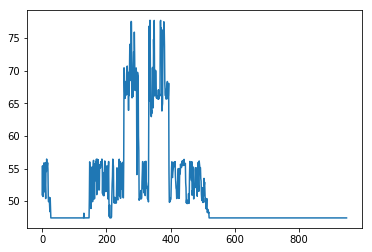

In [38]:

plt.plot(y_pred)

In [39]:
y_test = test_df['Close'].values

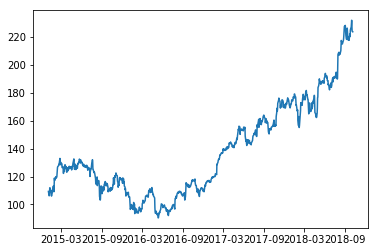

In [40]:
plt.plot(test_df['Close'])

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_pred, test_df['Close'])

-185.41590425850097

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [44]:
model = Sequential()
model.add(Dense(10, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.add(Dense(10, input_shape=(X_test.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=200, verbose=1)
#EarlyStopping(monitor='val_loss', min_delta=0.1, patience=.1, verbose=0, mode='auto')

Epoch 1/200
3551/3551 [==============================] - 1s 239us/step - loss: 1542.0230
Epoch 2/200
3551/3551 [==============================] - 0s 137us/step - loss: 851.9328
Epoch 3/200
3551/3551 [==============================] - 0s 138us/step - loss: 363.0287
Epoch 4/200
3551/3551 [==============================] - 0s 121us/step - loss: 113.9498
Epoch 5/200
3551/3551 [==============================] - 1s 141us/step - loss: 43.2694
Epoch 6/200
3551/3551 [==============================] - 0s 140us/step - loss: 23.1289
Epoch 7/200
3551/3551 [==============================] - 0s 136us/step - loss: 16.3198
Epoch 8/200
3551/3551 [==============================] - 1s 142us/step - loss: 13.0710
Epoch 9/200
3551/3551 [==============================] - 1s 174us/step - loss: 10.5804
Epoch 10/200
3551/3551 [==============================] - 1s 155us/step - loss: 7.9170
Epoch 11/200
3551/3551 [==============================] - 1s 143us/step - loss: 5.9108
Epoch 12/200
3551/3551 [==============

3551/3551 [==============================] - 0s 124us/step - loss: 0.7166
Epoch 96/200
3551/3551 [==============================] - 0s 104us/step - loss: 0.8745
Epoch 97/200
3551/3551 [==============================] - 0s 103us/step - loss: 0.8186
Epoch 98/200
3551/3551 [==============================] - 0s 121us/step - loss: 0.7937
Epoch 99/200
3551/3551 [==============================] - 0s 116us/step - loss: 0.8722
Epoch 100/200
3551/3551 [==============================] - 0s 103us/step - loss: 0.6665
Epoch 101/200
3551/3551 [==============================] - 0s 103us/step - loss: 0.9045
Epoch 102/200
3551/3551 [==============================] - 0s 107us/step - loss: 0.7695
Epoch 103/200
3551/3551 [==============================] - 0s 102us/step - loss: 0.6983
Epoch 104/200
3551/3551 [==============================] - 0s 130us/step - loss: 0.7006
Epoch 105/200
3551/3551 [==============================] - 0s 104us/step - loss: 0.8256
Epoch 106/200
3551/3551 [=========================

3551/3551 [==============================] - 0s 103us/step - loss: 0.7981
Epoch 189/200
3551/3551 [==============================] - 0s 102us/step - loss: 0.8229
Epoch 190/200
3551/3551 [==============================] - 0s 102us/step - loss: 0.7698
Epoch 191/200
3551/3551 [==============================] - 0s 104us/step - loss: 0.7238
Epoch 192/200
3551/3551 [==============================] - 0s 103us/step - loss: 0.7560
Epoch 193/200
3551/3551 [==============================] - 1s 223us/step - loss: 1.4052
Epoch 194/200
3551/3551 [==============================] - 1s 149us/step - loss: 0.9496
Epoch 195/200
3551/3551 [==============================] - 1s 144us/step - loss: 0.7761
Epoch 196/200
3551/3551 [==============================] - 1s 141us/step - loss: 0.7100
Epoch 197/200
3551/3551 [==============================] - 1s 207us/step - loss: 0.8086
Epoch 198/200
3551/3551 [==============================] - 1s 178us/step - loss: 0.7345
Epoch 199/200
3551/3551 [=====================

0.30113446971217006

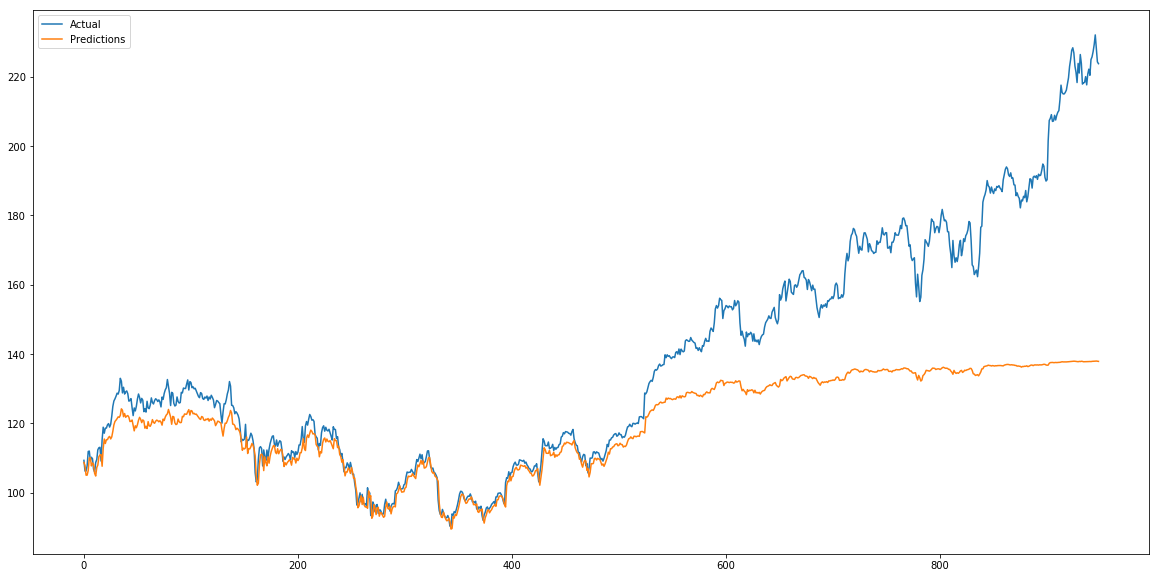

In [45]:
plt.figure(figsize=(20,10))
y_pred = model.predict(X_test)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predictions')
plt.legend()
r2_score(y_test, y_pred)

In [46]:
import numpy as np

In [47]:
df.tail()

,Close,Rates,lag,std_1,std
Date,,,,,
2018-10-02,229.279999,2.03,227.259995,2.765297,3.299545
2018-10-03,232.070007,2.03,229.279999,3.299545,2.875024
2018-10-04,227.990005,2.03,232.070007,2.875024,2.385556
2018-10-05,224.289993,2.03,227.990005,2.385556,2.844152
2018-10-08,223.770004,2.03,224.289993,2.844152,3.482401


In [53]:
#rate = 2
lag = 222
#std = 2.482

In [58]:
pred_1 = np.array([[lag]])

In [59]:
#pred_1 = np.array([[0.00324675, 0.194511396, 0.30064325]])

In [60]:
pred_1.shape

(1, 1)

In [61]:
model.predict(pred_1)

array([[137.85194]], dtype=float32)